# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt   # 데이터 시각화
import pandas as pd  # 데이터 가공

In [2]:
# 데이터 읽어오기
dataset = pd.read_csv('LinearRegressionData.csv')   # csv파일로부터 데이터 읽어오기

In [3]:
dataset.head()   # 데이터 중 상위 5개만 보여줌 -> head함수

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
X = dataset.iloc[:, :-1].values   # [행, 열] / 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수 - 원인)
Y = dataset.iloc[:, -1].values   # 마지막 컬럼 데이터 (종속변수 - 결과)

In [5]:
X, Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [6]:
from sklearn.linear_model import LinearRegression   # LinearRegression 클래스 사용(import)
# 데이터를 가장 잘 표현하는 선 한개를 이 클래스를 통해 그려줌
reg = LinearRegression()   # 객체 생성
reg.fit(X,Y)   #fit ; 학습시킴 / 학습하면서 모델 생성

LinearRegression()

In [7]:
# 예측값 알아내기
y_pred = reg.predict(X)   # X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

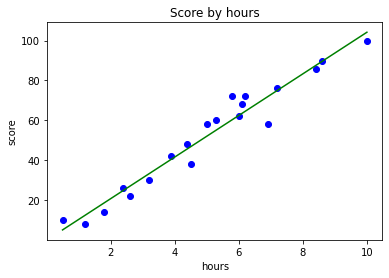

In [8]:
# 데이터 시각화 
plt.scatter(X, Y, color = 'blue')   # 산점도 그래프 표현
plt.plot(X, y_pred, color = 'green')   # 선 그래프 표현
plt.title('Score by hours')   # 그래프 제목
plt.xlabel('hours')   # x축 이름
plt.ylabel('score')   # y축 이름
plt.show()

In [9]:
# 9시간 공부 시 예상 점수는?
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]]))   # 2차원 배열 형태로 들어가야해(맞춰줘야하기 때문)
print('9시간, 8시간, 7시간 공부했을 때 예상 점수 : ', reg.predict([[9], [8], [7]]))   # 2차원 배열 형태로 들어가야해(맞춰줘야하기 때문)

9시간 공부했을 때 예상 점수 :  [93.77478776]
9시간, 8시간, 7시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [10]:
# 선그래프의 기울기 y=mx+b 에서의 m
reg.coef_

array([10.44369694])

In [11]:
# 선그래프의 y절편 y=mx+b 에서의 b
reg.intercept_

-0.21848470286721522

 y=mx+b -> y = 10.4436x - 0.2184

### 데이터 세트 분리

In [12]:
import matplotlib.pyplot as plt   # 데이터 시각화
import pandas as pd  # 데이터 가공

In [13]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [14]:
X = dataset.iloc[:, :-1].values   # 독립변수
y = dataset.iloc[:, -1].values    # 종속변수

In [15]:
from sklearn.model_selection import train_test_split   # 훈련데이터와 테스트데이터 분리 -> 튜플형태로 값이 4개로 나온다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)   
# 독립변수와 종속변수를 입력파라미터로 넣어주고 테스트세트를 20%(0.2)로 쓰겠다(즉 훈련:테스트 = 8:2으로 분리)

In [16]:
X, len(X)   # 전체 데이터 X, X의 갯수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [17]:
# 훈련세트 가져오기
X_train, len(X_train)
# 데이터의 순서가 랜덤임을 알 수 있다(random_state 사용했으므로)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [18]:
# 테스트세트 가져오기
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [19]:
y, len(y)   # 전체 데이터 y, y의 갯수

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [20]:
# 훈련세트
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [21]:
# 테스트세트
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()   # 회귀모델로 만들기 위한 객체 생성

In [23]:
reg.fit(X_train, y_train)   # 훈련세트로 학습하여 모델 생성

LinearRegression()

### 데이터 시각화 (훈련세트)

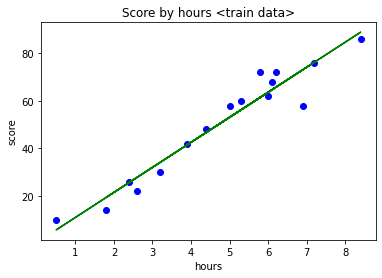

In [24]:
plt.scatter(X_train, y_train, color = 'blue')   # 산점도 그래프 표현
plt.plot(X_train, reg.predict(X_train), color = 'green')   # X_train을 넣었을 때의 예측값을 y축 데이터로 사용
plt.title('Score by hours <train data>')   # 그래프 제목
plt.xlabel('hours')   # x축 이름
plt.ylabel('score')   # y축 이름
plt.show()

### 데이터 시각화 (테스트세트)

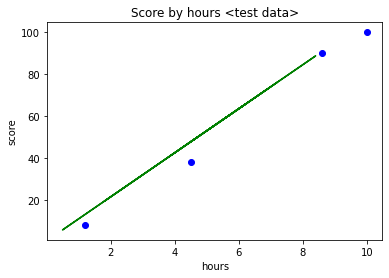

In [25]:
plt.scatter(X_test, y_test, color = 'blue')   # 산점도 그래프 표현
plt.plot(X_train, reg.predict(X_train), color = 'green')   # X_train을 넣었을 때의 예측값을 y축 데이터로 사용
plt.title('Score by hours <test data>')   # 그래프 제목
plt.xlabel('hours')   # x축 이름
plt.ylabel('score')   # y축 이름
plt.show()

In [26]:
reg.coef_

array([10.49161294])

In [27]:
reg.intercept_

0.6115562905169796

y=mx+b -> y = 10.4916x + 0.6115  ( 전체 데이터를 이용했을 때의 피팅한 그래프와 살짝 달라졌음을 알 수 있다 )

### 모델 평가

In [28]:
reg.score(X_test, y_test)   # 테스트세트를 통한 모델 평가(0~1 사이)

0.9727616474310156

In [29]:
reg.score(X_train, y_train)   # 훈련세트를 통한 모델 평가(0~1 사이)

0.9356663661221668

## 경사하강법 Gradient Descent

max_iter : 훈련 세트 반복 횟수(Epoch 횟수)

eta0 : 학습률 (learning rate)

In [30]:
from sklearn.linear_model import SGDRegressor   # SGD ; Stochastic Gradient Descent 확률적 경사하강법

sr = SGDRegressor()
# sr = SGDRegressor(max_iter = 200, eta0 = 1e-4, random_state = 0, verbose = 1)  
# sr = SGDRegressor(max_iter = 1000, eta0 = 1e-3, random_state = 0, verbose = 1)
# 객체 생성, 반복횟수(훈련세트 반복횟수)와 학습률 설정, 무작위, verbose = 1은 훈련세트 반복하면서 손실이 어떻게 줄어드는지 보여줌

# 학습률은 지수표기법으로도 입력 가능
# 1e-3 == 0.001 (10^-3)
# 1e+3 == 1000 (10^3)

# 학습률

sr.fit(X_train, y_train)

SGDRegressor()

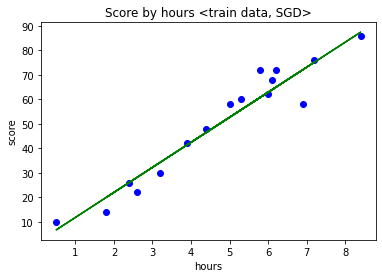

In [31]:
# 데이터 시각화
plt.scatter(X_train, y_train, color = 'blue')   # 산점도 그래프 표현
plt.plot(X_train, sr.predict(X_train), color = 'green')   # X_train을 넣었을 때의 예측값을 y축 데이터로 사용
plt.title('Score by hours <train data, SGD>')   # 그래프 제목
plt.xlabel('hours')   # x축 이름
plt.ylabel('score')   # y축 이름
plt.show()

In [32]:
# 훈련데이터로 구해진 기울기(10.4916),y절편(0.6115)과 비교하자 

sr.coef_, sr.intercept_

(array([10.21125946]), array([1.62396218]))

In [33]:
# 테스트 세트를 통한 모델 평가
sr.score(X_test, y_test)

0.9752827588625406

In [34]:
# 훈련 세트를 통한 모델 평가
sr.score(X_train, y_train)

0.9348095126055159

In [35]:
# 보통 좋은 모델의 경우 ;  훈련세트에 대한 점수가 (테스트세트에 대한 점수보다) 높다